#Tensorflow

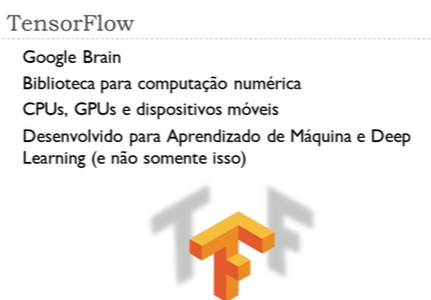

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [ ]:
#imagens de roupas 28x28
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4978 - accuracy: 0.8254
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3758 - accuracy: 0.8645
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3371 - accuracy: 0.8778
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3142 - accuracy: 0.8846
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2928 - accuracy: 0.8921


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.4020 - accuracy: 0.8526
Test accuracy: 0.8525999784469604


In [ ]:
predictions = model.predict(test_images)

In [ ]:
predictions[0]

array([5.8307160e-06, 4.3405038e-07, 5.0541769e-07, 5.9068457e-09,
       8.8934377e-07, 4.7431355e-03, 3.3417092e-07, 1.6003383e-02,
       2.8490642e-04, 9.7896063e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9

In [ ]:
img = test_images[0]

print(img.shape)


(28, 28)


In [ ]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

[[5.8307160e-06 4.3405078e-07 5.0541814e-07 5.9068457e-09 8.8934377e-07
  4.7431379e-03 3.3417061e-07 1.6003391e-02 2.8490584e-04 9.7896063e-01]]


In [ ]:
np.argmax(predictions_single[0])

9